---
# Section 8.1: The Discrete Least Squares Approximation
---

## Polynomial Least squares

#### Motivation:

If we have several points $$(1,1.3);\; (2,3.5); (3,4.2); (4,5.0); (5,7); (6,8.8); (7,10.1); (8,12.5); (9,13.0); (10,15.6)$$ to be interpolated as follows:

![title](Fig8.1.png)

The following polynomial is clearly a poor predictor of the information. 

![title](Fig8.2.png)

A better approach would be to find the "best" approximating line, even if it does not agree precisely with the data at any point. 

![title](Fig8.3.png)

The general problem of approximating a set of data, $\{(x_i, y_i) \quad |\quad  i = 1, 2, \ldots , m\}$, with an algebraic polynomial

$$P_n(x) = a_nx^n + a_{n−1}x^{n−1} + \cdots + a_1x + a_0,$$
of degree $n < m - 1$, using the least squares procedure is handled similarly. We choose the
constants $a_0, a_1, \ldots, a_n$ to minimize the least squares error $E = E_2(a_0, a_1, \ldots , a_n)$, where

$$E=\sum_{i=1}^m(y_i-P_n(x_i))^2=\sum_{i=1}^m\left(y_i-\left(a_nx_i^n + a_{n−1}x_i^{n−1} + \cdots + a_1x_i + a_0\right)\right)^2,$$

for E to be minimized it is necessary that $\displaystyle \frac{\partial E}{\partial a_j} = 0$, for each $j = 0,1,\ldots,n$. Thus, for each $j$, we must have

$$0=\displaystyle \frac{\partial E}{\partial a_j}=-2\sum_{i=1}^m\left(y_i-\left(a_nx_i^n + a_{n−1}x_i^{n−1} + \cdots + a_1x_i + a_0\right)\right)x_i^j.$$

This gives the **Normal Equations** with $n+1$ equations and $n+1$ unknowns $a_j$ as follows:

$$\begin{bmatrix}
  \sum_{i=1}^m x_i^0 & \sum_{i=1}^m x_i^1 & \cdots & \sum_{i=1}^m x_i^n \\
  \sum_{i=1}^m x_i^1 & \sum_{i=1}^m x_i^2 & \cdots & \sum_{i=1}^m x_i^{n+1} \\
  \vdots & \vdots & \ddots & \vdots \\
  \sum_{i=1}^m x_i^n & \sum_{i=1}^m x_i^{n+1} & \cdots & \sum_{i=1}^m x_i^{n+n}\\
  \end{bmatrix}\begin{bmatrix}a_0\\a_1\\\vdots\\a_n \end{bmatrix}=\begin{bmatrix}\sum_{i=1}^my_ix_i^0\\\sum_{i=1}^my_ix_i^1\\\vdots\\\sum_{i=1}^my_ix_i^n \end{bmatrix}.$$
  
If we define $Y=\begin{bmatrix}y_1\\y_2\\\vdots\\y_m \end{bmatrix}\in \mathbb{R}^{m}$ and $A\in \mathbb{R}^{m\times (n+1)}$ as

$$A=\begin{bmatrix}
1 & x_1 & \cdots & x_1^n\\
1 & x_2 & \cdots & x_2^n\\
\vdots & \vdots & \ddots & \vdots\\
1 & x_m & \cdots & x_m^n\\
\end{bmatrix},$$ then

$$A^TAa=A^TY$$ are the **Normal Equations**, where $$a=\begin{bmatrix}a_0\\a_1\\\vdots\\a_n \end{bmatrix}.$$ 


## Over-determined linear systems

Let $A \in \mathbb{R}^{m \times n}$ and $b \in \mathbb{R}^m$. 

If $m > n$, we say the linear system 

$$
Ax = b
$$ 

is **over-determined**.

Often over-determined linear systems have no solution, typically due to measurement errors in  $b$.

---

## Minimizing the error

Since we cannot solve $Ax=b$ exactly, we want to find $x$ such that the **residual**

$$
r = b - Ax
$$

is as small as possible:

$$
\min_x \|b - Ax\|
$$

We can consider many different norms, such as:

$$
\|b - Ax\|_1 = \sum_{i=1}^m \big| b_i - (Ax)_i \big| = \sum_{i=1}^m \big| b_i - a_i^Tx \big|
$$

$$
\|b - Ax\|_2 = \sqrt{\sum_{i=1}^m \big( b_i - (Ax)_i \big)^2} = \sqrt{\sum_{i=1}^m \big( b_i - a_i^Tx \big)^2}
$$

$$
\|b - Ax\|_\infty = \max_{1\leq i\leq m} \big| b_i - (Ax)_i \big| = \max_{1\leq i\leq m} \big| b_i - a_i^Tx \big|
$$





---

## Least squares

When the error in the entries of $b$ are believed to be **identically and independently [normally distributed](https://en.wikipedia.org/wiki/Normal_distribution)** with **zero mean** and **constant variance**, the best choice is to minimize $\|b - Ax\|_2$. 

In this case, the $x$ that minimizes $\|b - Ax\|_2$ is the **maximum likelihood estimator** of the true solution.

Minimizing $\|b - Ax\|_2$ is equivalent to minimizing

$$
\|b - Ax\|_2^2 = \sum_{i=1}^m \big( b_i - (Ax)_i \big)^2.
$$


The $x$ that minimizes $\|b - Ax\|_2$ (or equivalently $\|b - Ax\|_2^2$) is called the **least-squares solution** because it is minimizing the **sum-of-the-squares** of the errors.

![Paranormal distribution](http://m.jech.bmj.com/content/60/1/6/embed/graphic-1.gif "A visual comparison of normal and paranormal distributions")

<center>
[A visual comparison of normal and paranormal distributions](http://jech.bmj.com/content/60/1/6.full) by Matthew Freeman
</center>


---

## Solving the least-squares problem

In Julia (or MATLAB), we can solve the least-squares problem

$$
\min_x \|b - Ax\|_2
$$

by using the same **backslash** function that we used to solve $n \times n$ linear systems:

```julia
x = A\b
```

Julia will recognize that the linear system is over-determined and will use an algorithm for solving the least-squares problem that is based on the $QR$-factorization of $A$.

---
## Example: 

Approximate the points $(x_i,y_i)$ with $i=1,2,\ldots,10$:

$$(1,1.3);\; (2,3.5);\; (3,4.2);\; (4,5.0);\; (5,7);\; (6,8.8);\; (7,10.1);\; (8,12.5);\; (9,13.0);\; (10,15.6)$$

### The approximate quadratic polynomial

We let our approximation be given by

$$
p(x) = a_0 + a_1 x + a_2 x^2
$$

and we want to find the coefficients $a_0, a_1, a_2$.

We want to minimize

$$
\sum_{i=1}^{m} \big(y_i - p(x_i)\big)^2.
$$

The residual $y_i - p(x_i)$ can be written as

$
y_i - \left(a_0 + a_1 x_i + a_2 x^2_i\right) = y_i - \begin{bmatrix} 1 & x_i & x^2_i \end{bmatrix} \begin{bmatrix} a_0 \\ a_1 \\ a_2 \end{bmatrix}.
$$

Therefore, the $i^\mathrm{th}$-row of the matrix $A$ is $\begin{bmatrix} 1 & x_i & x^2_i \end{bmatrix}$:

$$
A = 
\begin{bmatrix} 
1 & x_1 & x^2_1 \\
1 & x_2 & x^2_2 \\
\vdots&\vdots&\vdots\\
1 & x_m & x^2_m \\
\end{bmatrix}
$$

and $b \in \mathbb{R}^m$ such that $b_i = y_i$ for $i = 1,2,\ldots,m$. 

Then 

$$
\sum_{i=1}^m \big(y_i - p(x_i)\big)^2 = \|b - Ax\|_2^2.
$$

In [5]:
A = [1 1 1; 1 2 2^2; 1 3 3^2; 1 4 4^2;1 5 5^2;
    1 6 6^2;1 7 7^2;1 8 8^2;1 9 9^2;1 10 10^2]

b = [1.3;3.5;4.2;5.0;7;8.8;10.1;12.5;13.0;15.6]

## Solve the least squares problem:  min norm(b - A*x) or equivalently solve A^TA*x=A^T*b
x = A\b

A = [1 1 1; 1 2 2^2; 1 3 3^2; 1 4 4^2;1 5 5^2;
    1 6 6^2;1 7 7^2;1 8 8^2;1 9 9^2;1 10 10^2]

A'*A

3×3 Array{Int64,2}:
  10    55    385
  55   385   3025
 385  3025  25333

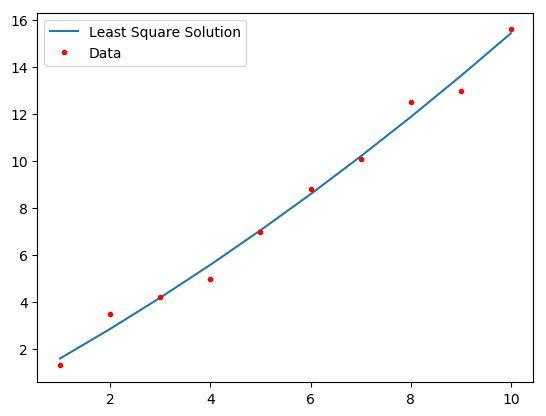

In [2]:
using PyPlot
p(x) =  0.406667 + 1.15485*x + 0.0348485*x.^2

m = 10
xx = (1,2,3,4,5,6,7,8,9,10)
tt=linspace(1, 10, m)


yy = (1.3,3.5,4.2,5.0,7,8.8,10.1,12.5,13.0,15.6)
plot(tt, p(tt), label="Least Square Solution")
plot(xx, yy, "r.", label="Data")
legend();

### The approximating line 

We let our approximation be given by

$$
p(x) = a_0 + a_1 x 
$$

and we want to find the coefficients $a_0, a_1$.

In [3]:
A = [1 1; 1 2; 1 3; 1 4;1 5;
    1 6;1 7;1 8;1 9;1 10]

b = [1.3;3.5;4.2;5.0;7;8.8;10.1;12.5;13.0;15.6]

## Solve the least squares problem:  min norm(b - A*x) or equivalently solve A^TA*x=A^T*b
x = A\b

2-element Array{Float64,1}:
 -0.36   
  1.53818

In [3]:
A = [1 1; 1 2; 1 3; 1 4;1 5;
    1 6;1 7;1 8;1 9;1 10]
b = [1.3;3.5;4.2;5.0;7;8.8;10.1;12.5;13.0;15.6]
A'*A

c=A'*b
#A^TA*x=A^T*b Normal Equations
A'*A\c

2-element Array{Float64,1}:
 -0.36   
  1.53818

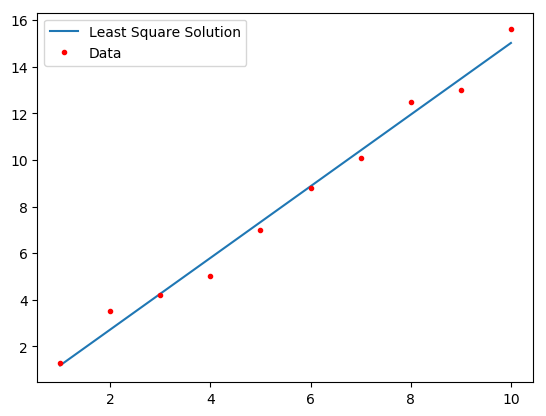

In [4]:
using PyPlot
p(x) =  -0.36 + 1.53818*x 

m = 10
xx = (1,2,3,4,5,6,7,8,9,10)
tt=linspace(1, 10, m)


yy = (1.3,3.5,4.2,5.0,7,8.8,10.1,12.5,13.0,15.6)
plot(tt, p(tt), label="Least Square Solution")
plot(xx, yy, "r.", label="Data")
legend();

---